In [3]:
from keras_facenet import FaceNet
import cv2
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

2024-12-17 09:00:20.741361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 09:00:21.322123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 09:00:21.324209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-17 09:00:22.340944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
dataset = "dataset/images"

## Initiazling facenet embeder

In [5]:
embedder = FaceNet()

In [6]:
facenet_model = embedder.model
print(facenet_model.summary())

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, None, None, 32)       96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, None, None, 32)       0         ['Conv2d_1a_

In [7]:
img = cv2.imread("dataset/images/bibek/1.png")
emb = embedder.embeddings(np.expand_dims(img, axis=0))
len(emb[0])

1/1 [==============================] - 1s 1s/step


512

## Extracting Features

In [8]:
features = []  
labels = []
for root, files, images in os.walk(dataset):
    print(root.split("/")[-1])

    for image in images:
        
        img = cv2.imread(os.path.join(root, image))
        embedeing = embedder.embeddings(np.expand_dims(img,axis=0))
        features.append(embedeing)
        labels.append(root.split("/")[-1])


images
dipesh
1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 59ms/step
sweksha
1/1 [==============================] - 0s 75ms/step
divya
1/1 [==============================] - 0s 53ms/step
bibek
1/1 [==============================] - 0s 77ms/step
mikey
1/1 [==============================] - 0s 53ms/step


In [9]:
for index,label in enumerate(labels):
    labels[index] = label.split("\\")[-1]

# Get Features and Label

In [10]:
features = np.array(features)
fet = features[:,0,:]
labels = np.array(labels)

In [11]:
fet.shape

(5000, 512)

# Split

In [12]:
x_train, x_test , y_train, y_test =  train_test_split(fet, labels, test_size = 0.2, random_state=42)

# Fit

In [13]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
knn_predictions = knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aacacfee1f0>
Traceback (most recent call last):
  File "/workspaces/projects-AI-ML-Neelgai/.venv/lib/python3.8/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/workspaces/projects-AI-ML-Neelgai/.venv/lib/python3.8/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/workspaces/projects-AI-ML-Neelgai/.venv/lib/python3.8/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


KNN Classification Report
              precision    recall  f1-score   support

       bibek       1.00      1.00      1.00       210
      dipesh       1.00      1.00      1.00       216
       divya       1.00      1.00      1.00       192
       mikey       1.00      1.00      1.00       192
     sweksha       1.00      1.00      1.00       190

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

KNN Accuracy:  1.0


# Save

In [15]:
import joblib
joblib.dump(knn, 'face_attendance_model/emb_knn_model.pkl')

['face_attendance_model/emb_knn_model.pkl']

# Load and Test 

In [16]:
import matplotlib.pyplot as plt

classes = list(set(labels))

In [17]:
import joblib
knn = joblib.load("face_attendance_model/emb_knn_model.pkl")

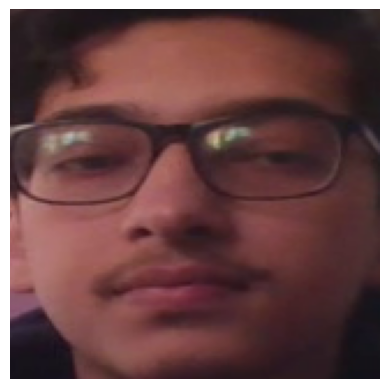

1/1 [==============================] - 0s 57ms/step
['bibek']
[[1. 0. 0. 0. 0.]]


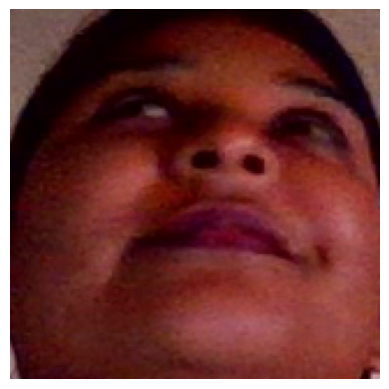

1/1 [==============================] - 0s 67ms/step
['sweksha']
[[0. 0. 0. 0. 1.]]


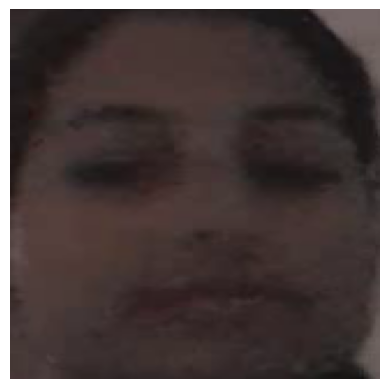

1/1 [==============================] - 0s 60ms/step
['divya']
[[0. 0. 1. 0. 0.]]


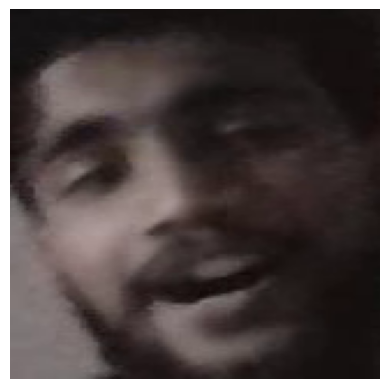

1/1 [==============================] - 0s 105ms/step
['mikey']
[[0. 0. 0. 1. 0.]]


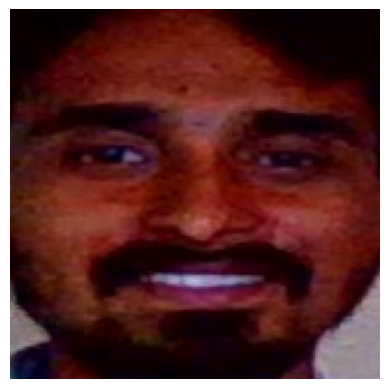

1/1 [==============================] - 0s 71ms/step
['dipesh']
[[0. 1. 0. 0. 0.]]


In [18]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = knn.predict(emb)
        print(prediction)
        proba = knn.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)

# SVM

In [19]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [20]:
svm_predictions = svm.predict(x_test)
print("SVC Classification Report")
print(classification_report(y_test, svm_predictions))
print("SVC Accuracy: ", accuracy_score(y_test, svm_predictions))

SVC Classification Report
              precision    recall  f1-score   support

       bibek       1.00      1.00      1.00       210
      dipesh       1.00      1.00      1.00       216
       divya       1.00      1.00      1.00       192
       mikey       1.00      1.00      1.00       192
     sweksha       1.00      1.00      1.00       190

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

SVC Accuracy:  1.0


# Save

In [21]:
import joblib
joblib.dump(svm, 'face_attendance_model/emb_svm_model.pkl')

['face_attendance_model/emb_svm_model.pkl']

In [22]:
import joblib
svm = joblib.load("face_attendance_model/emb_svm_model.pkl")

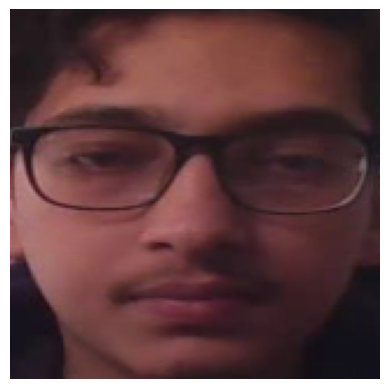

1/1 [==============================] - 0s 55ms/step
['bibek']
[[9.98034044e-01 4.09166106e-04 4.00047138e-04 6.10176057e-04
  5.46567043e-04]]


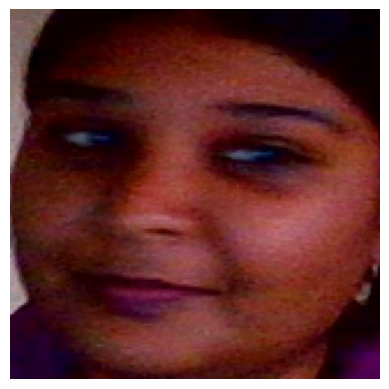

1/1 [==============================] - 0s 53ms/step
['sweksha']
[[3.65706783e-04 3.91606060e-04 1.29454143e-03 8.84702604e-04
  9.97063443e-01]]


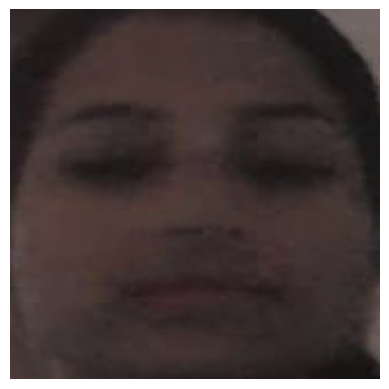

1/1 [==============================] - 0s 60ms/step
['divya']
[[9.29770322e-04 4.91180098e-04 9.96880215e-01 8.73764543e-04
  8.25070248e-04]]


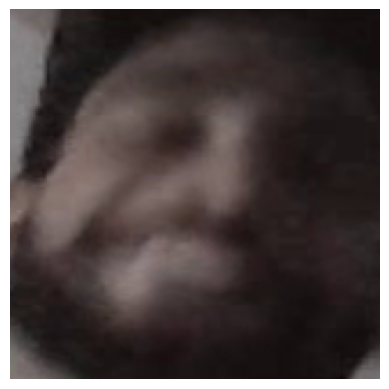

1/1 [==============================] - 0s 59ms/step
['mikey']
[[9.80143904e-04 1.53096425e-03 8.27082571e-04 9.94180147e-01
  2.48166236e-03]]


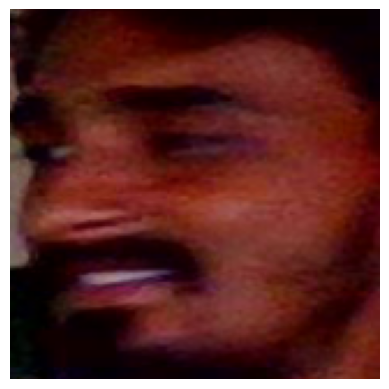

1/1 [==============================] - 0s 68ms/step
['dipesh']
[[6.33017328e-04 9.95575995e-01 6.36726925e-04 2.23950906e-03
  9.14752074e-04]]


In [23]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        emb=  embedder.embeddings(np.expand_dims(img,axis=0))
        
        prediction = svm.predict(emb)
        print(prediction)
        proba = svm.predict_proba(emb)
        print(proba)
        
    except Exception as e:
       print(e)